#  Exploring the Correlation of the Words and Phrases Pt 2
---

Looking at correlations with the postive class switched (i.e. AskHistorians is negative and History is postive).

In [37]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')

In [29]:
reddit_df= pd.read_csv('../data/reddit_df.csv')

In [30]:
reddit_df['subs_switched'] = reddit_df['subreddit'].map({1:0, 0:1})

In [31]:
X = reddit_df['full_text_clean']
y = reddit_df['subs_switched']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=22)

In [32]:
model2 = make_pipeline(CountVectorizer(ngram_range=(2,2)), LogisticRegression())

In [33]:
model2.fit(X_train, y_train)
print(f'Train: {model2.score(X_train, y2_train)}')
print(f'Test: {model2.score(X_test, y2_test)}')

C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train: 0.9993319973279893
Test: 0.8877755511022044


In [34]:
model2.named_steps['logisticregression'].coef_

array([[-0.04428929,  0.01807627,  0.06972742, ...,  0.06630044,
         0.03202935,  0.02312104]])

In [35]:
coef = np.exp(model2.named_steps['logisticregression'].coef_)[0]
features = model2.named_steps['countvectorizer'].get_feature_names()
feat_dict = dict(zip(features, coef))

In [36]:
coef_df = pd.DataFrame.from_dict(feat_dict, orient='index')
coef_df.columns = ['Coef']
coef_df.sort_values(by='Coef', ascending=False).head(20)

,Coef
throughout history,3.544497
history buff,2.637800
year ago,2.497869
oil defeated,2.120456
celtic warfare,2.120456
ancient celtic,2.120456
defeated nazi,2.120456
year old,2.096580
buff terror,1.979540
anyone know,1.952208


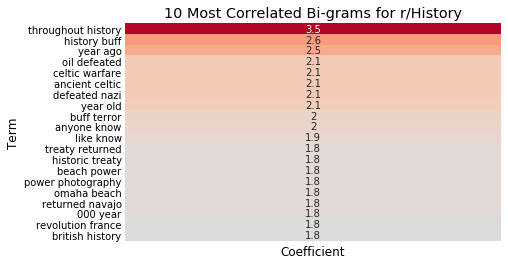

In [40]:
sns.heatmap(coef_df.sort_values(by='Coef', ascending=False).head(20), 
            cmap='coolwarm',
            vmin=0,
            annot=True,
            cbar=False,
            xticklabels=False
           )
plt.title('10 Most Correlated Bi-grams for r/History')
plt.ylabel('Term')
plt.xlabel('Coefficient');

The terms seem to be more casual than AskHistorians.